In [1]:
import os
from datetime import datetime
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read In the data Before Black Friday

In [2]:
tracking_df = pd.read_csv('tracking.csv')
print(tracking_df.shape)

(15425, 7)


In [3]:
tracking_df.head()

,product_id,product_name,product_link,product_price,product_old_price,product_discount,Date
0,EA102EL1HFX4ENAFAMZ,Eaget Pen Flash Drive 3.0 64GB - Metal OTG Mic...,https://www.jumia.com.ng/pen-flash-drive-3.0-6...,"₦ 2,990","₦ 4,275",30%,37:05.5
1,GE779EA1BY9XTNAFAMZ,Ultra-thin Wireless Mouse 2.4G Rechargeable Si...,https://www.jumia.com.ng/generic-ultra-thin-wi...,"₦ 2,980","₦ 4,950",40%,37:05.8
2,GE779EA06FRMRNAFAMZ,HYSLGjt 128GB OTG Usb Flash Drive +micro Usb +...,https://www.jumia.com.ng/hyslgjt-128gb-otg-usb...,"₦ 3,890","₦ 5,990",35%,37:06.0
3,GE779EA2YMRZMNAFAMZ,UWY 64GB Pendrive Flash . DriveUSB 2.0 Metal H...,https://www.jumia.com.ng/uwy-64gb-pendrive-fla...,"₦ 2,120","₦ 3,876",45%,37:06.1
4,EA102EL15J90UNAFAMZ,Eaget Pen Flash Drive 3.0 32GB - Metal OTG Mic...,https://www.jumia.com.ng/pen-flash-drive-3.0-3...,"₦ 2,690","₦ 4,117",35%,37:06.3


In [4]:
tracking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15425 entries, 0 to 15424
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_id         15425 non-null  object
 1   product_name       15425 non-null  object
 2   product_link       15425 non-null  object
 3   product_price      15425 non-null  object
 4   product_old_price  11433 non-null  object
 5   product_discount   11433 non-null  object
 6   Date               15425 non-null  object
dtypes: object(7)
memory usage: 843.7+ KB


In [5]:
# 1 duplicates
tracking_df.product_link.duplicated().sum()


1

### Data Cleaning

0. Drop duplicate
1. Convert product_price and product_old_price to number
2. Remove percentage symbol in product_discount column
3. Drop the Date Column


### 1. Dropping Duplicates

In [6]:
tracking_df.drop_duplicates(subset="product_link", keep=False, inplace=True)
tracking_df.product_link.duplicated().sum()

0

In [7]:
### 2. Clean Product Prices
# 1. take only lower bound for prices that are range e.g 7,000 - 8,000

tracking_df['product_price'] = tracking_df['product_price'].apply(lambda x: x.split('-')[0].strip() )
tracking_df['product_price'] = tracking_df['product_price'].str.replace(',|₦', '', regex=True)
tracking_df['product_price'] = tracking_df['product_price'].astype(float)

tracking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15423 entries, 0 to 15424
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         15423 non-null  object 
 1   product_name       15423 non-null  object 
 2   product_link       15423 non-null  object 
 3   product_price      15423 non-null  float64
 4   product_old_price  11431 non-null  object 
 5   product_discount   11431 non-null  object 
 6   Date               15423 non-null  object 
dtypes: float64(1), object(6)
memory usage: 963.9+ KB


In [8]:
### 2. Clean Product Old Prices

tracking_df['product_old_price'] = tracking_df['product_old_price'].apply(lambda x: str(x).split('-')[0].strip() )
tracking_df['product_old_price'] = tracking_df['product_old_price'].str.replace(',|₦', '', regex=True)
tracking_df['product_old_price'] = tracking_df['product_old_price'].astype(float)

tracking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15423 entries, 0 to 15424
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         15423 non-null  object 
 1   product_name       15423 non-null  object 
 2   product_link       15423 non-null  object 
 3   product_price      15423 non-null  float64
 4   product_old_price  11431 non-null  float64
 5   product_discount   11431 non-null  object 
 6   Date               15423 non-null  object 
dtypes: float64(2), object(5)
memory usage: 963.9+ KB


In [9]:
### 2. Clean Product Percentages
tracking_df['product_discount'] = tracking_df['product_discount'].str.replace('%', '').astype(float)
tracking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15423 entries, 0 to 15424
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         15423 non-null  object 
 1   product_name       15423 non-null  object 
 2   product_link       15423 non-null  object 
 3   product_price      15423 non-null  float64
 4   product_old_price  11431 non-null  float64
 5   product_discount   11431 non-null  float64
 6   Date               15423 non-null  object 
dtypes: float64(3), object(4)
memory usage: 963.9+ KB


In [10]:
### 3. Drop Date Column
tracking_df.drop(columns='Date', inplace=True)
tracking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15423 entries, 0 to 15424
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         15423 non-null  object 
 1   product_name       15423 non-null  object 
 2   product_link       15423 non-null  object 
 3   product_price      15423 non-null  float64
 4   product_old_price  11431 non-null  float64
 5   product_discount   11431 non-null  float64
dtypes: float64(3), object(3)
memory usage: 843.4+ KB


In [11]:
# preview the clean data
tracking_df.head()

,product_id,product_name,product_link,product_price,product_old_price,product_discount
0,EA102EL1HFX4ENAFAMZ,Eaget Pen Flash Drive 3.0 64GB - Metal OTG Mic...,https://www.jumia.com.ng/pen-flash-drive-3.0-6...,2990.0,4275.0,30.0
1,GE779EA1BY9XTNAFAMZ,Ultra-thin Wireless Mouse 2.4G Rechargeable Si...,https://www.jumia.com.ng/generic-ultra-thin-wi...,2980.0,4950.0,40.0
2,GE779EA06FRMRNAFAMZ,HYSLGjt 128GB OTG Usb Flash Drive +micro Usb +...,https://www.jumia.com.ng/hyslgjt-128gb-otg-usb...,3890.0,5990.0,35.0
3,GE779EA2YMRZMNAFAMZ,UWY 64GB Pendrive Flash . DriveUSB 2.0 Metal H...,https://www.jumia.com.ng/uwy-64gb-pendrive-fla...,2120.0,3876.0,45.0
4,EA102EL15J90UNAFAMZ,Eaget Pen Flash Drive 3.0 32GB - Metal OTG Mic...,https://www.jumia.com.ng/pen-flash-drive-3.0-3...,2690.0,4117.0,35.0


## Black Friday Records

In [12]:

blackfriday_df = pd.read_csv('products_04-11-2022_combined.csv')

for day in range(5, 29):
    day_filename = "products_{:02d}-11-2022_combined.csv".format(day)
    day_df = pd.read_csv(day_filename)
    blackfriday_df = pd.concat([blackfriday_df, day_df])
    

In [13]:
blackfriday_df.shape

(292677, 9)

In [14]:
blackfriday_df.head()

,Unnamed: 0,file_name,file_datetime,has_bf_label,product_name,product_categories,product_price,product_old_price,product_percentage
0,0,128gb-cruzer-glide-3.0-usb-flash-drive-sandisk...,2022-11-04 23:28:04.128734,1,SanDisk 128GB Cruzer Glide 3.0 USB Flash Drive,"Computing,Computers,Data Storage,USB Flash Drives","₦ 8,500",NaN,NaN
1,1,15.6-inch-value-topload-case-hp-mpg123014.html,2022-11-04 23:10:07.393930,1,Hp 15.6 Inch Value Topload Case,"Computing,Computers,Laptop Accessories,Bags, C...","₦ 6,400","₦ 6,500",2%
2,2,18163264gb-rotary-usb-2.0-flash-drive-memory-s...,2022-11-04 23:04:28.493043,1,UWY USB Flash Drive 64GB Pen USB 2.0 Metal Hig...,"Computing,Computers,Data Storage,USB Flash Drives","₦ 2,081","₦ 3,900",47%
3,3,1g-silicone-compound-heatsink-thermal-paste-gr...,2022-11-04 23:14:58.472082,0,1g Silicone Compound Heatsink Thermal Paste Gr...,"Computing,Computer Accessories","₦ 1,500",NaN,NaN
4,4,1more-comfobuds-pro-true-wireless-headphones-1...,2022-11-04 23:20:03.512969,0,1More Comfobuds Pro True Wireless Headphones,"Electronics,Accessories & Supplies,Audio & Vid...","₦ 42,999","₦ 50,999",16%


In [15]:
blackfriday_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292677 entries, 0 to 11924
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          292677 non-null  int64 
 1   file_name           292677 non-null  object
 2   file_datetime       292677 non-null  object
 3   has_bf_label        292677 non-null  int64 
 4   product_name        292677 non-null  object
 5   product_categories  292677 non-null  object
 6   product_price       292677 non-null  object
 7   product_old_price   228952 non-null  object
 8   product_percentage  228952 non-null  object
dtypes: int64(2), object(7)
memory usage: 22.3+ MB


## Data Cleaning

1. Drop the Unnamed column
2. Convert file_Datetime to datetime
3. Clean product_price,	product_old_price and product_percentage

In [16]:
#drop unamed column
blackfriday_df.drop(columns=['Unnamed: 0'], inplace=True)
blackfriday_df['file_datetime'] = pd.to_datetime(blackfriday_df['file_datetime'])
blackfriday_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292677 entries, 0 to 11924
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   file_name           292677 non-null  object        
 1   file_datetime       292677 non-null  datetime64[ns]
 2   has_bf_label        292677 non-null  int64         
 3   product_name        292677 non-null  object        
 4   product_categories  292677 non-null  object        
 5   product_price       292677 non-null  object        
 6   product_old_price   228952 non-null  object        
 7   product_percentage  228952 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 20.1+ MB


In [17]:
### 2. Clean Product Prices
# 1. take only lower bound for prices that are range e.g 7,000 - 8,000

blackfriday_df['product_price'] = blackfriday_df['product_price'].apply(lambda x: x.split('-')[0].strip() )
blackfriday_df['product_price'] = blackfriday_df['product_price'].str.replace(',|₦', '', regex=True)
blackfriday_df['product_price'] = blackfriday_df['product_price'].astype(float)

blackfriday_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292677 entries, 0 to 11924
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   file_name           292677 non-null  object        
 1   file_datetime       292677 non-null  datetime64[ns]
 2   has_bf_label        292677 non-null  int64         
 3   product_name        292677 non-null  object        
 4   product_categories  292677 non-null  object        
 5   product_price       292677 non-null  float64       
 6   product_old_price   228952 non-null  object        
 7   product_percentage  228952 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 20.1+ MB


In [18]:
### 2. Clean Product Old Prices

blackfriday_df['product_old_price'] = blackfriday_df['product_old_price'].apply(lambda x: str(x).split('-')[0].strip() )
blackfriday_df['product_old_price'] = blackfriday_df['product_old_price'].str.replace(',|₦', '', regex=True)
blackfriday_df['product_old_price'] = blackfriday_df['product_old_price'].astype(float)

blackfriday_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292677 entries, 0 to 11924
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   file_name           292677 non-null  object        
 1   file_datetime       292677 non-null  datetime64[ns]
 2   has_bf_label        292677 non-null  int64         
 3   product_name        292677 non-null  object        
 4   product_categories  292677 non-null  object        
 5   product_price       292677 non-null  float64       
 6   product_old_price   228952 non-null  float64       
 7   product_percentage  228952 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 20.1+ MB


In [19]:
### 2. Clean Product Percentages
blackfriday_df['product_discount'] = blackfriday_df['product_percentage'].str.replace('%', '').astype(float)
blackfriday_df.drop(columns=['product_percentage'], inplace=True)
blackfriday_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292677 entries, 0 to 11924
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   file_name           292677 non-null  object        
 1   file_datetime       292677 non-null  datetime64[ns]
 2   has_bf_label        292677 non-null  int64         
 3   product_name        292677 non-null  object        
 4   product_categories  292677 non-null  object        
 5   product_price       292677 non-null  float64       
 6   product_old_price   228952 non-null  float64       
 7   product_discount    228952 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 20.1+ MB


## Questions 

1. `How many products actually have real discounts `
2. `How many products have fake discounts `
3. `What are the Max and Min Discounts on products`

In [20]:


blackfriday_df_group = blackfriday_df.groupby("file_name").apply(lambda x: x.sort_values(["product_price"], ascending = True))




In [21]:
blackfriday_df_grouped = blackfriday_df.groupby("file_name")
blackfriday_best = []
for name, df in blackfriday_df_grouped:
    blackfriday_best.append(list(df.sort_values(by=["product_price"], ascending=True).reset_index().iloc[0]))
    
blackfriday_best_df = pd.DataFrame(blackfriday_best)


In [22]:
blackfriday_best_df.drop(columns=0, inplace=True)

In [23]:
blackfriday_best_df.columns = blackfriday_df.columns
blackfriday_best_df.head()

,file_name,file_datetime,has_bf_label,product_name,product_categories,product_price,product_old_price,product_discount
0,1-to-1-gluten-free-baking-flour-44oz-2lbs-1.24...,2022-11-05 07:40:02.126957,1,Bob'S Red Mill 1 To 1 Gluten Free Baking Flour...,"Grocery,Cooking & Baking,Flours & Meals,Barley...",11000.0,NaN,NaN
1,1-to-1-gluten-free-baking-flour-64oz-4lbs-bobs...,2022-11-05 07:10:56.757004,0,Bob'S Red Mill 1 To 1 Gluten Free Baking Flour...,"Grocery,Cooking & Baking,Flours & Meals,Barley...",16800.0,NaN,NaN
2,1.5l-multipurpose-blender-with-smoothie-maker-...,2022-11-05 07:13:15.942507,1,Binatone 1.5L Multipurpose Blender With Smooth...,"Home & Office,Home & Kitchen,Kitchen & Dining,...",16900.0,18590.0,9.0
3,10-litres-heavy-duty-stand-mixer-sokany-mpg167...,2022-11-05 07:16:18.603034,1,Sokany 10 Litres Heavy Duty Stand Mixer,"Home & Office,Small & Cooking Appliances,Small...",140000.0,NaN,NaN
4,100-genuine-ink-445-black-and-446-colour-canon...,2022-11-05 06:41:46.544072,1,Canon 100% Genuine Ink 445 Black And 446 Colour,"Computing,Computer Accessories,Printer Ink & T...",24900.0,32140.0,23.0


## Lets Join the original pricings before balckfriday


In [24]:
# extract file name
tracking_df["file_name"] = tracking_df["product_link"].str.replace('https://www.jumia.com.ng/', '', regex=False)
tracking_df.head()

,product_id,product_name,product_link,product_price,product_old_price,product_discount,file_name
0,EA102EL1HFX4ENAFAMZ,Eaget Pen Flash Drive 3.0 64GB - Metal OTG Mic...,https://www.jumia.com.ng/pen-flash-drive-3.0-6...,2990.0,4275.0,30.0,pen-flash-drive-3.0-64gb-metal-otg-micro-usb-t...
1,GE779EA1BY9XTNAFAMZ,Ultra-thin Wireless Mouse 2.4G Rechargeable Si...,https://www.jumia.com.ng/generic-ultra-thin-wi...,2980.0,4950.0,40.0,generic-ultra-thin-wireless-mouse-2.4g-recharg...
2,GE779EA06FRMRNAFAMZ,HYSLGjt 128GB OTG Usb Flash Drive +micro Usb +...,https://www.jumia.com.ng/hyslgjt-128gb-otg-usb...,3890.0,5990.0,35.0,hyslgjt-128gb-otg-usb-flash-drive-micro-usb-ty...
3,GE779EA2YMRZMNAFAMZ,UWY 64GB Pendrive Flash . DriveUSB 2.0 Metal H...,https://www.jumia.com.ng/uwy-64gb-pendrive-fla...,2120.0,3876.0,45.0,uwy-64gb-pendrive-flash-.-driveusb-2.0-metal-h...
4,EA102EL15J90UNAFAMZ,Eaget Pen Flash Drive 3.0 32GB - Metal OTG Mic...,https://www.jumia.com.ng/pen-flash-drive-3.0-3...,2690.0,4117.0,35.0,pen-flash-drive-3.0-32gb-metal-otg-micro-usb-t...


In [25]:


black_and_original_df = blackfriday_best_df.merge(tracking_df, on='file_name', suffixes=['_black', '_orig'])
black_and_original_df.head()


,file_name,file_datetime,has_bf_label,product_name_black,product_categories,product_price_black,product_old_price_black,product_discount_black,product_id,product_name_orig,product_link,product_price_orig,product_old_price_orig,product_discount_orig
0,1-to-1-gluten-free-baking-flour-44oz-2lbs-1.24...,2022-11-05 07:40:02.126957,1,Bob'S Red Mill 1 To 1 Gluten Free Baking Flour...,"Grocery,Cooking & Baking,Flours & Meals,Barley...",11000.0,NaN,NaN,BO113FF1CJXG2NAFAMZ,Bob'S Red Mill 1 To 1 Gluten Free Baking Flour...,https://www.jumia.com.ng/1-to-1-gluten-free-ba...,11000.0,NaN,NaN
1,1-to-1-gluten-free-baking-flour-64oz-4lbs-bobs...,2022-11-05 07:10:56.757004,0,Bob'S Red Mill 1 To 1 Gluten Free Baking Flour...,"Grocery,Cooking & Baking,Flours & Meals,Barley...",16800.0,NaN,NaN,BO113FF12N2R7NAFAMZ,Bob'S Red Mill 1 To 1 Gluten Free Baking Flour...,https://www.jumia.com.ng/1-to-1-gluten-free-ba...,16800.0,NaN,NaN
2,1.5l-multipurpose-blender-with-smoothie-maker-...,2022-11-05 07:13:15.942507,1,Binatone 1.5L Multipurpose Blender With Smooth...,"Home & Office,Home & Kitchen,Kitchen & Dining,...",16900.0,18590.0,9.0,BI681HL0VAB3ONAFAMZ,Binatone 1.5L Multipurpose Blender With Smooth...,https://www.jumia.com.ng/1.5l-multipurpose-ble...,18590.0,NaN,NaN
3,10-litres-heavy-duty-stand-mixer-sokany-mpg167...,2022-11-05 07:16:18.603034,1,Sokany 10 Litres Heavy Duty Stand Mixer,"Home & Office,Small & Cooking Appliances,Small...",140000.0,NaN,NaN,SO535HA089N1KNAFAMZ,Sokany 10 Litres Heavy Duty Stand Mixer,https://www.jumia.com.ng/10-litres-heavy-duty-...,140000.0,NaN,NaN
4,100-genuine-ink-445-black-and-446-colour-canon...,2022-11-05 06:41:46.544072,1,Canon 100% Genuine Ink 445 Black And 446 Colour,"Computing,Computer Accessories,Printer Ink & T...",24900.0,32140.0,23.0,CA701EL1M9IGANAFAMZ,Canon 100% Genuine Ink 445 Black And 446 Colour,https://www.jumia.com.ng/100-genuine-ink-445-b...,24900.0,32140.0,23.0


### Lets's Add extra columns
1. Change in product price 
2. change in percentage discount

In [26]:
black_and_original_df["price_diff"] = black_and_original_df["product_price_orig"] - black_and_original_df["product_price_black"]
black_and_original_df["old_price_diff"] = black_and_original_df["product_old_price_orig"] - black_and_original_df["product_old_price_black"]
black_and_original_df["discount_diff"] = black_and_original_df["product_discount_orig"] - black_and_original_df["product_discount_black"]

### How many Have a black Friday Label

0    7938
1    7074
Name: has_bf_label, dtype: int64


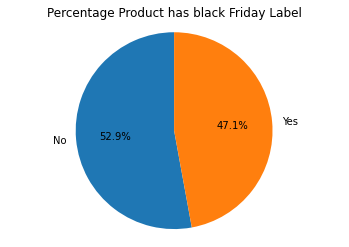

In [27]:
has_bf_label_count = black_and_original_df.has_bf_label.value_counts()
has_bf_label_count_norm = black_and_original_df.has_bf_label.value_counts(normalize=True).sort_index(ascending=True)
print(has_bf_label_count)

fig, ax = plt.subplots()
ax.pie(has_bf_label_count_norm, labels=["No", "Yes"], autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage Product has black Friday Label")
plt.show()

In [28]:
black_and_original_df.describe()

,has_bf_label,product_price_black,product_old_price_black,product_discount_black,product_price_orig,product_old_price_orig,product_discount_orig,price_diff,old_price_diff,discount_diff
count,15012.000000,1.501200e+04,1.178700e+04,11787.000000,1.501200e+04,1.113900e+04,11139.000000,1.501200e+04,11099.000000,11099.000000
mean,0.471223,2.981895e+04,3.935441e+04,37.186901,3.079215e+04,3.788467e+04,36.232068,9.732054e+02,-191.246779,-2.117488
std,0.499188,9.122450e+04,1.027461e+05,19.111019,9.287771e+04,9.886272e+04,17.897563,2.236510e+04,12433.745175,6.656321
min,0.000000,2.000000e+01,7.000000e+01,1.000000,2.500000e+01,3.000000e+02,1.000000,-5.000000e+05,-520000.000000,-66.000000
25%,0.000000,3.890000e+03,6.529000e+03,22.000000,4.081000e+03,6.996000e+03,23.000000,0.000000e+00,0.000000,-2.000000
50%,0.000000,8.300000e+03,1.299000e+04,40.000000,8.500000e+03,1.300000e+04,40.000000,0.000000e+00,0.000000,0.000000
75%,1.000000,2.099600e+04,3.252400e+04,50.000000,2.121100e+04,3.217550e+04,49.000000,1.000000e+02,0.000000,0.000000
max,1.000000,4.700000e+06,3.500000e+06,99.000000,4.700000e+06,3.500000e+06,99.000000,2.071000e+06,500000.000000,46.000000


### A product has a weird diffrence 0f about 2.7 million naira discount, so we will drop it

In [29]:
product_with_highest_price = black_and_original_df["price_diff"] > 2000000

black_and_original_df[product_with_highest_price]


,file_name,file_datetime,has_bf_label,product_name_black,product_categories,product_price_black,product_old_price_black,product_discount_black,product_id,product_name_orig,product_link,product_price_orig,product_old_price_orig,product_discount_orig,price_diff,old_price_diff,discount_diff
5183,generic-bluetooth-headset-pro3-waterproof-earb...,2022-11-05 06:53:12.824958,0,Bluetooth Headset PRO3 Waterproof Earbuds Air3...,"Electronics,Headphones,Earbud Headphones",9800.0,NaN,NaN,GE779EA23WSJ5NAFAMZ,Bluetooth Headset PRO3 Waterproof Earbuds Air3...,https://www.jumia.com.ng/generic-bluetooth-hea...,2080800.0,NaN,NaN,2071000.0,NaN,NaN


In [30]:
# This must be a typo, we will drop the product
black_and_original_df.drop(black_and_original_df[product_with_highest_price].index, inplace=True)

# let's confirm
black_and_original_df[product_with_highest_price]

<ipython-input-30-154eeae78fae>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  black_and_original_df[product_with_highest_price]


,file_name,file_datetime,has_bf_label,product_name_black,product_categories,product_price_black,product_old_price_black,product_discount_black,product_id,product_name_orig,product_link,product_price_orig,product_old_price_orig,product_discount_orig,price_diff,old_price_diff,discount_diff


## Filter out only the 7074 products that have black friday deals

In [31]:
black_friday_df = black_and_original_df.loc[black_and_original_df['has_bf_label'] == 1]
print(black_friday_df.shape)
black_friday_df.head()

(7074, 17)


,file_name,file_datetime,has_bf_label,product_name_black,product_categories,product_price_black,product_old_price_black,product_discount_black,product_id,product_name_orig,product_link,product_price_orig,product_old_price_orig,product_discount_orig,price_diff,old_price_diff,discount_diff
0,1-to-1-gluten-free-baking-flour-44oz-2lbs-1.24...,2022-11-05 07:40:02.126957,1,Bob'S Red Mill 1 To 1 Gluten Free Baking Flour...,"Grocery,Cooking & Baking,Flours & Meals,Barley...",11000.0,NaN,NaN,BO113FF1CJXG2NAFAMZ,Bob'S Red Mill 1 To 1 Gluten Free Baking Flour...,https://www.jumia.com.ng/1-to-1-gluten-free-ba...,11000.0,NaN,NaN,0.0,NaN,NaN
2,1.5l-multipurpose-blender-with-smoothie-maker-...,2022-11-05 07:13:15.942507,1,Binatone 1.5L Multipurpose Blender With Smooth...,"Home & Office,Home & Kitchen,Kitchen & Dining,...",16900.0,18590.0,9.0,BI681HL0VAB3ONAFAMZ,Binatone 1.5L Multipurpose Blender With Smooth...,https://www.jumia.com.ng/1.5l-multipurpose-ble...,18590.0,NaN,NaN,1690.0,NaN,NaN
3,10-litres-heavy-duty-stand-mixer-sokany-mpg167...,2022-11-05 07:16:18.603034,1,Sokany 10 Litres Heavy Duty Stand Mixer,"Home & Office,Small & Cooking Appliances,Small...",140000.0,NaN,NaN,SO535HA089N1KNAFAMZ,Sokany 10 Litres Heavy Duty Stand Mixer,https://www.jumia.com.ng/10-litres-heavy-duty-...,140000.0,NaN,NaN,0.0,NaN,NaN
4,100-genuine-ink-445-black-and-446-colour-canon...,2022-11-05 06:41:46.544072,1,Canon 100% Genuine Ink 445 Black And 446 Colour,"Computing,Computer Accessories,Printer Ink & T...",24900.0,32140.0,23.0,CA701EL1M9IGANAFAMZ,Canon 100% Genuine Ink 445 Black And 446 Colour,https://www.jumia.com.ng/100-genuine-ink-445-b...,24900.0,32140.0,23.0,0.0,0.0,0.0
5,100-genuine-original-650va-ups-metal-blue-gate...,2022-11-05 07:03:49.821330,1,Blue Gate 100% Genuine Original 650VA UPS - Metal,"Electronics,Accessories & Supplies,Power Prote...",35000.0,NaN,NaN,BL670EL05L6V8NAFAMZ,Blue Gate 100% Genuine Original 650VA UPS - Metal,https://www.jumia.com.ng/100-genuine-original-...,35000.0,NaN,NaN,0.0,NaN,NaN


## Show of discounts distribution

This will give us a preview of how the discount are spread accross all products that have increased or decreased in products price

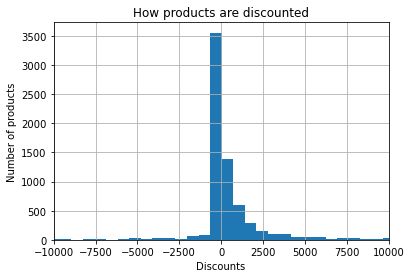

In [32]:
black_friday_df.price_diff.hist(bins=1000)
plt.xlim([-10000, 10000])
plt.xlabel("Discounts")
plt.ylabel("Number of products")
plt.title("How products are discounted")
plt.show()

`The above shows that although the products are marked as black friday deals, there are increase in some product price and the positive increase is mostly between 0 and 2500`

## Let's see how many prices increased, descreased and unchanged

Same price    47.639242
Discounted    45.094713
Increased      7.266045
Name: discount_cat, dtype: float64


<ipython-input-33-ff1b43b4f11b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_friday_df['discount_cat'] = np.select(conditions, values)


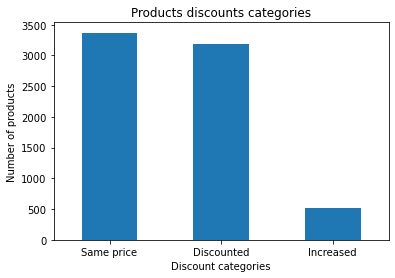

In [33]:
black_friday_df['price_diff']


# create a list of our conditions for categories
conditions = [
    (black_friday_df['price_diff'] > 0),
    (black_friday_df['price_diff'] < 0),
    (black_friday_df['price_diff'] == 0)
    ]

# create a list of the values we want to assign for each condition
values = ['Discounted', 'Increased', 'Same price']

# create a new column and use np.select to assign values to it using our lists as arguments
black_friday_df['discount_cat'] = np.select(conditions, values)


# display updated DataFrame
print(black_friday_df['discount_cat'].value_counts(normalize=True)*100)
black_friday_df['discount_cat'].value_counts().plot(kind='bar')
plt.xlabel("Discount categories")
plt.ylabel("Number of products")
plt.title("Products discounts categories")
plt.xticks(rotation = 0)
plt.show()



`The above shows discounts categories, some product have increased values and same pricing. We can further check maybe the percentage discount was use to effect this behaviour`

## Where pecentage discount changed for products in Same price categories?

`A total of 3704 had the black friday tag with increase or decrease in price, we will explore those to see if they are all positive or not`

## Show some products with increased values.